**Author**: *Papagrigoriou Vasileios Savvas* (vpapagr@csd.auth.gr)

# Ex1. Logistic Regression

# Import Libraries

In [291]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset to DataFrame

In [292]:
df = pd.read_csv('/content/sample_data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Convert DataFrame to x (inputs), y (targets) arrays

In [293]:
input_columns = ['Insulin','Age','Pregnancies']
target_column = 'Outcome'

X = df[input_columns].to_numpy()
y = df[target_column].to_numpy()

# Split Dataset to Train-Test

In [294]:
random_state = 0
test_ratio = 0.3

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=random_state,test_size=test_ratio)

# Create a Logistic Regression Model

In [295]:
# I will create and train the models together
classifierNone = linear_model.LogisticRegression(penalty=None,random_state=random_state)
classifierL1 = linear_model.LogisticRegression(penalty='l1',random_state=random_state,solver='liblinear')
classifierL2 = linear_model.LogisticRegression(random_state=random_state)

# Train Model

In [296]:
# Train All Models
classifierNone.fit(x_train,y_train)
classifierL1.fit(x_train,y_train)
classifierL2.fit(x_train,y_train)

LogisticRegression(random_state=0)

# Compute Diabetes Predictions

In [297]:
# Compute the predictions
y_predNone = classifierNone.predict(x_test)
y_predL1 = classifierL1.predict(x_test)
y_predL2 = classifierL2.predict(x_test)

# Compute Model's Accuracy

In [298]:
# Display The accuracy score for each model
accuracyNone = accuracy_score(y_test,y_predNone)
accuracyL1 = accuracy_score(y_test,y_predL1)
accuracyL2 = accuracy_score(y_test,y_predL2)

print(f'using None: {accuracyNone}\nusing L1: {accuracyL1}\nusing L2: {accuracyL2}')

using None: 0.696969696969697
using L1: 0.7012987012987013
using L2: 0.696969696969697


# -- Answer The Question: --
# Which model is better:


*   A model that mostly predicts that a patient has no Diabetes, even though they have
*   A model that mostly predicts that a patient has diabetes, even though they don't have

# Answer:

The model that is better is the **second one** because it is more important to find more patients who actually have diabetes and misdiagnose some of them rather than the person having diabetes and the model failing to diagnose them correctly.



# Repeat same process for ages:



*   0-40
*   41-100



Enter your answer here...

In [299]:
#getting the index
indexes = x_test[:, 1] <= 40

In [300]:
#find the under 40 values
under40 = x_test[indexes]
y_test_under40 = y_test[indexes]

In [301]:
#find the over 40 values
over40 = x_test[indexes==False]
y_test_over40 = y_test[indexes==False]

In [302]:

#predict using L2 regularization
under40_predicted = classifierL2.predict(under40)
over40_predicted = classifierL2.predict(over40)

In [303]:
#accuracy for both
under40_acc = accuracy_score(y_test_under40,under40_predicted)
over40_acc = accuracy_score(y_test_over40,over40_predicted)

Under40 Accuracy: 0.7247191011235955
Over40 Accuracy: 0.6037735849056604



<BarContainer object of 2 artists>

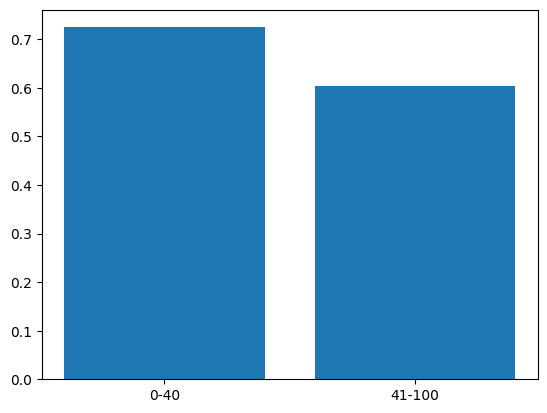

In [304]:
print(f'Under40 Accuracy: {under40_acc}\nOver40 Accuracy: {over40_acc}\n')

# Plot results
plt.bar(['0-40','41-100'],[under40_acc,over40_acc])

#Answer:
  All the models work better for ages between 0-40 than they do for ages between 41-100.

 I choose to plot the L2 model as an example.

# Ex2. Linear Regression

# Select Corresponding Features for this task

In [305]:
%reset -f
# just to have my variables section clear

import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# pretty-print table
from tabulate import tabulate


In [306]:
# Import 2 Linear Regression models
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
# Import metrics
from sklearn.metrics import mean_absolute_error as MAE

In [307]:
# Choose the columns
input_col=['Age','BMI','Pregnancies']
target_col='BloodPressure'
df = pd.read_csv('/content/sample_data/diabetes.csv')


# Split Dataset to x, y

In [308]:
# Getting the data from columns
X=df[input_col]
y=df[target_col]

# Split Dataset to Train-Test

In [309]:
# Splited Data
random_state=0
test_ratio=0.3
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=random_state,test_size=test_ratio)

# Compute BloodPressure Predictions

In [310]:
# Create the models
modelSGDR=SGDRegressor(loss='squared_error',learning_rate='constant',penalty='l2',eta0=0.01,tol=1e-3,random_state=random_state)
modelLR=LinearRegression()

In [311]:
# fit the models
modelLR.fit(X_train,y_train)
modelSGDR.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', random_state=0)

In [312]:
#make predictions
y_predLR=modelLR.predict(X_test)
y_predSGDR=modelSGDR.predict(X_test)

In [313]:
# Measurements for each model
maeLR = MAE(y_test,y_predLR)
maeSGDR = MAE(y_test,y_predSGDR)
print(f' Linear Regression model MAE: {maeLR}\n \
SGDRegressor model MAE: {maeSGDR}\n')

 Linear Regression model MAE: 10.923279710580168
 SGDRegressor model MAE: 3714793244517.3906



#MAE of Linear Regression model
The mean absolute Error for the Linear Regression model is **10.923**

#Compute the mean and variant of BloodPressure

In [341]:
# Y_Test
mean_test=y_test.mean()
std_test=y_test.std()

# Y_Train
mean_train=y_train.mean()
std_train=y_train.std()

print(f'Mean diff: {abs(mean_test-mean_train):.6f}\nStandard  Deviation Diff: {abs(std_test-std_train):.6f}')

Mean diff: 1.865801
Standard  Deviation Diff: 0.386855


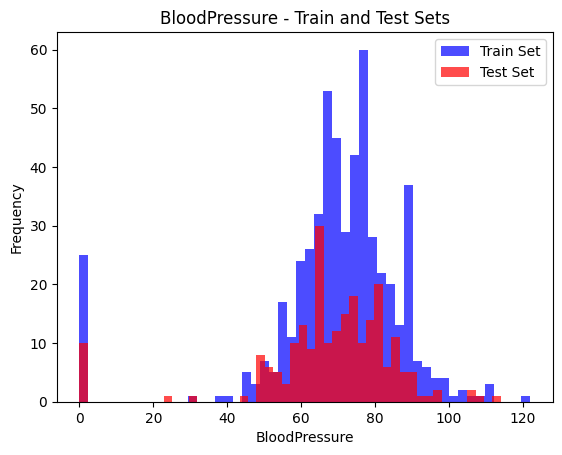

In [342]:
#create a figure and axis
fig, ax = plt.subplots()

#plot the histogram of the train set
ax.hist(y_train, bins=50, color='blue', alpha=0.7, label='Train Set')

#test set on the same axis
ax.hist(y_test, bins=50, color='red', alpha=0.7, label='Test Set')

#labels and title
ax.set_title('BloodPressure - Train and Test Sets')
ax.set_xlabel('BloodPressure')
ax.set_ylabel('Frequency')

#Display
ax.legend()
plt.show()


#Answer:
We can observe that, based on the variance (var) and mean absolute difference, as well as by looking at the histograms, the two datasets seem to be quite similar. This suggests that there is little difference between the two sets in terms of BloodPressure values

#Creating SGD with different penalty methods

In [321]:
# create the other models to see the penalty
modelSGDREl=SGDRegressor(loss='squared_error',learning_rate='constant',penalty='elasticnet',eta0=0.01,tol=1e-3,random_state=random_state)
modelSGDRL1=SGDRegressor(loss='squared_error',learning_rate='constant',penalty='l1',eta0=0.01,tol=1e-3,random_state=random_state)
modelSGDRNone=SGDRegressor(loss='squared_error',learning_rate='constant',penalty=None,eta0=0.01,tol=1e-3,random_state=random_state)


In [322]:
modelSGDRNone.fit(X_train,y_train)
modelSGDREl.fit(X_train,y_train)
modelSGDRL1.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', penalty='l1', random_state=0)

In [323]:
# Predictions for the other 3 models
y_predNone=modelSGDRNone.predict(X_test)
y_predEL=modelSGDREl.predict(X_test)
y_predL1=modelSGDRL1.predict(X_test)

#Table of MAE using different penalty methods and models

In [324]:
# MAE for the other models
maeNone=MAE(y_test,y_predNone)
maeEL=MAE(y_test,y_predEL)
maeL1=MAE(y_test,y_predL1)

In [325]:
# Compare the MAE
maeCompareTable = [
    ["SGD Regressor None", maeNone],
    ["SGD Regressor Elastic Net", maeEL],
    ["SGD Regressor L1", maeL1],
    ["SGD Regressor L2", maeSGDR],
    ["Linear Regression", maeLR]
  ]
print(tabulate(sorted(maeCompareTable, key=lambda x: x[1]), headers=["Method", "MAE"]))

Method                              MAE
-------------------------  ------------
Linear Regression          10.9233
SGD Regressor L2            3.71479e+12
SGD Regressor L1            7.46593e+12
SGD Regressor Elastic Net   1.43204e+13
SGD Regressor None          1.92563e+13
